In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import InterpolatedUnivariateSpline
from scipy import stats
from scipy.stats import norm
from scipy.optimize import curve_fit
import glob
import os

In [3]:
#Read Data
skip=[0,1,2,3,4,5,6,7,8,9,10,2060,2061,2062,2063,2064,2065,2066,2067,2068,2069,2070,2071,2072,2073,2074]
Cs1=pd.read_csv("~/git/labdata/photonlab/9-13-22/Cs/Cs000.SPE", skiprows=skip, header=0, names=["Data"])
Cs2=pd.read_csv("~/git/labdata/photonlab/9-13-22/Cs/Cs001.SPE", skiprows=skip, header=0, names=["Data"])
Cs3=pd.read_csv("~/git/labdata/photonlab/9-13-22/Cs/Cs002.SPE", skiprows=skip, header=0, names=["Data"])
Cs4=pd.read_csv("~/git/labdata/photonlab/9-13-22/Cs/Cs003.SPE", skiprows=skip, header=0, names=["Data"])
Cs5=pd.read_csv("~/git/labdata/photonlab/9-13-22/Cs/Cs004.SPE", skiprows=skip, header=0, names=["Data"])
Cs6hr=pd.read_csv("~/git/labdata/photonlab/9-8-22/Jobs test/DECAY000.SPE", skiprows=skip, header=0, names=["Data"])
test = pd.read_csv("~/git/labdata/photonlab/9-13-22/Background/Background000.SPE")
#print(test)

path = './9-13-22/Background/*'
all_files = glob.glob(path)
#print(all_files[0])
li = []

Bg0 = pd.read_csv(all_files[0], skiprows=skip, header=0, names=["Data"])

for i in range(len(all_files)):
    Bg = pd.read_csv(all_files[i], skiprows=skip, header=0, names=["Data"])
    li.append(Bg)
#print(li)

In [4]:
#Average Data
Cs=Cs1.add(Cs2, axis=0).add(Cs3, axis=0).add(Cs4, axis=0).add(Cs5, axis=0).div(5).add(.5).astype(int)
Bg=Bg0
for i in range(1,479):
    Bg=Bg.add(li[i], axis=0).div(2)
Bg=Bg.add(0.5).astype(int)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


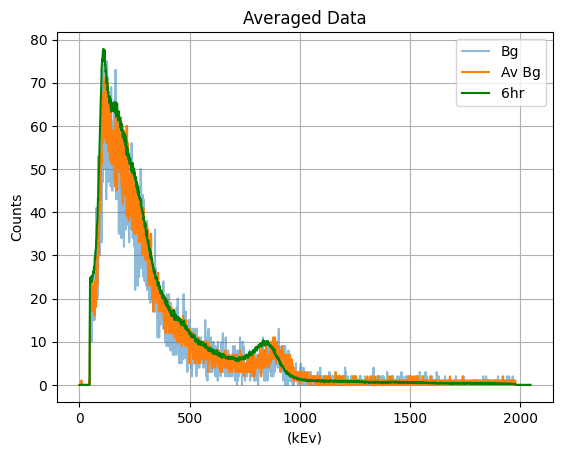

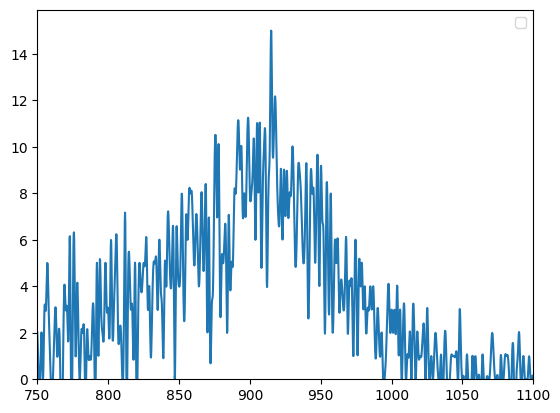

15.000370924849536
(array([965]),)
      Data
750      2
751      0
752      0
753      2
754      0
...    ...
1096     0
1097     1
1098     0
1099     0
1100     0

[351 rows x 1 columns]


In [9]:
#Plot Data
fig, ax = plt.subplots()
fig2, ax2 = plt.subplots()
#ax.plot(Cs, label="Cs")
ax.plot(Bg0, label="Bg", alpha=.5)
ax.plot(Bg, label="Av Bg")
ax.plot(Cs6hr/120, label="6hr", color = "green")
#ax2.plot(Cs-Bg, label="Diff")
#ax.plot(Cs6hr/120 -Bg, label="diff")

arr = np.arange(0,2048)
arr2 = np.arange(750,1101)
lin = np.linspace(750,1100,2048)
spl = InterpolatedUnivariateSpline(arr2, (Cs-Bg)[750:1101])
ax2.plot(lin,spl(lin))

plt.xlim(0,2047)
plt.ylim(0)
ax2.set_xlim([750,1100])

ax.set(xlabel='(kEv)', ylabel='Counts',
       title='Averaged Data')
ax.grid()
ax.legend()
plt.legend()

plt.show()
print(np.max(spl(lin)))
print(np.where(spl(lin)>14.998))
print((Cs-Bg)[750:1101])

In [316]:
#Output to csv
#o3.to_csv("averaged.csv", index=False, header=False)

1298.0
(array([  1,   2,   4,  11,  18,  30,  60,  97, 244, 245, 257, 260, 264,
       267, 274, 277, 279, 283, 284, 289, 291, 297, 300, 301, 304, 308,
       310, 311, 312, 315, 317, 318, 319, 323, 324, 325, 328, 329, 333,
       338, 341, 342, 344, 345, 346, 348, 349, 350]),)
0.0


/home/xavier/.local/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


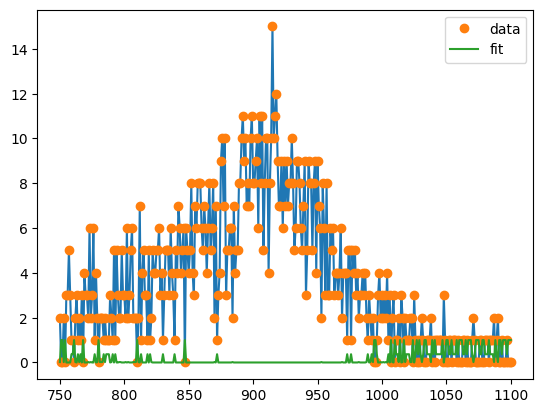

In [324]:
data = (Cs-Bg)[750:1101]
arrdata = np.abs(np.concatenate(np.asarray(data, dtype=np.float32)))

#print(arrdata)
plt.plot(arr2,arrdata)
# print(arr2)
# Define the Gaussian function
def Gauss(x, A, B):
    y = A*np.exp(-1*B*x**2)
    return y
parameters, covariance = curve_fit(Gauss, arr2, arrdata)
fit_A = parameters[0]
fit_B = parameters[1]
fit_y = Gauss(arrdata, fit_A, fit_B)
plt.plot(arr2, arrdata, 'o', label='data')
plt.plot(arr2, fit_y, '-', label='fit')
plt.legend()

print(sum(arrdata))
print(np.where(arrdata==0))
print(arrdata[4])

[1. 1.]


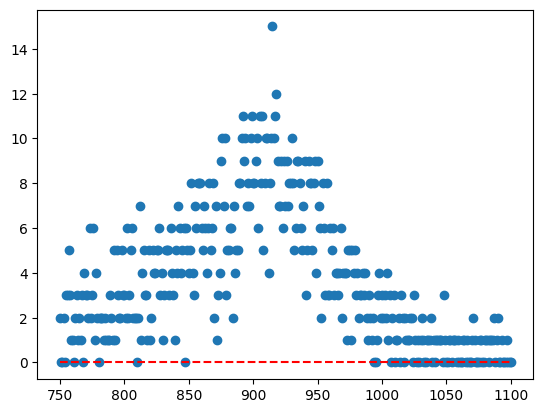

In [275]:
# fit a line to the economic data
from numpy import sin
from numpy import sqrt
from numpy import arange
from pandas import read_csv
from scipy.optimize import curve_fit
from matplotlib import pyplot

# Define the Gaussian function
def objective(x, A, B):
    y = A*np.exp(-1*B*x**2)
    return y

x = arr2
y = arrdata
# curve fit
popt, _ = curve_fit(Gauss, x, y)
# summarize the parameter values
a, b = popt
print(popt)
# plot input vs output
pyplot.scatter(x, y)
# define a sequence of inputs between the smallest and largest known inputs
x_line = arange(min(x), max(x), 1)
# calculate the output for the range
y_line = objective(x_line, a, b)
# create a line plot for the mapping function
pyplot.plot(x_line, y_line, '--', color='red')
pyplot.show()